## SPY - The Target

In [1]:
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
import numpy as np
import seaborn as sns
import os

In [2]:
ticker = 'SPY'

In [3]:
start='2007-01-01'[InternetShortcut]
URL=http://localhost:8889/notebooks/Desktop/new%20capstone/data/9-SPY_Target.ipynb#DBC---Commodities

end='2019-08-21'


In [4]:
financial_data = web.DataReader(ticker, 'yahoo', start, end)

## Vizualizating

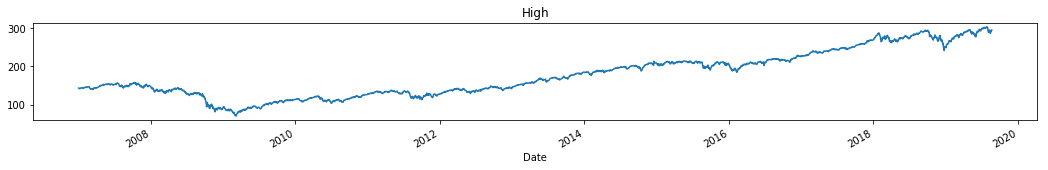

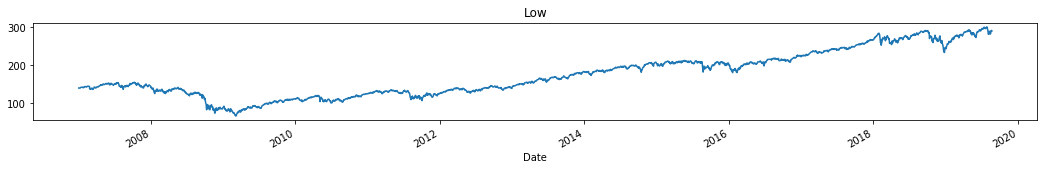

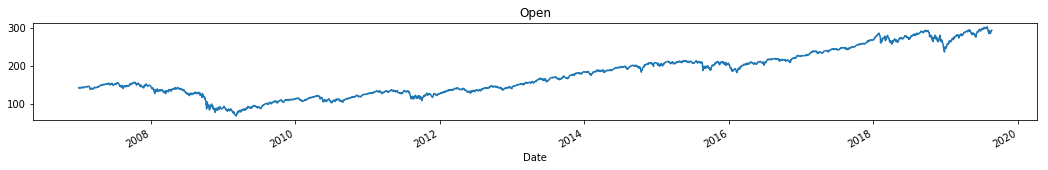

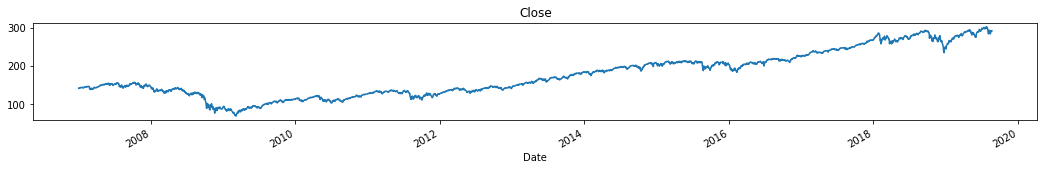

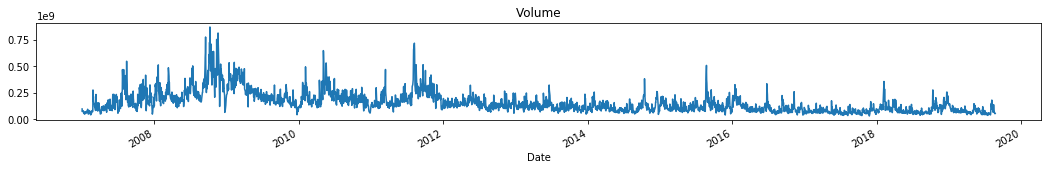

In [5]:
for col in financial_data.columns[:5]:
    plt.figure(figsize=(18,2))
    plt.title(col)
    financial_data[col].plot()


## Rolling Mean

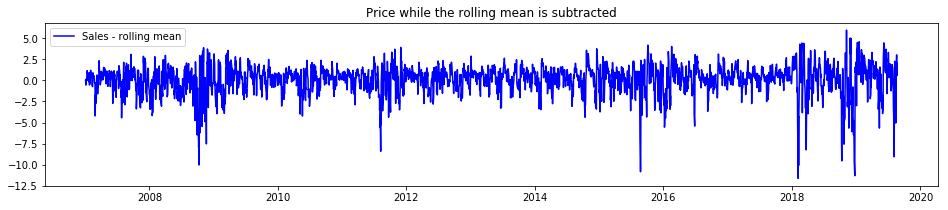

In [6]:
exp_rolmean = financial_data['Close'].ewm(halflife = 2).mean()
data_minus_exp_rolmean = financial_data['Close'] - exp_rolmean


fig = plt.figure(figsize=(16,3))
plt.plot(data_minus_exp_rolmean, color='blue',label='Sales - rolling mean')
plt.legend(loc='best')
plt.title('Price while the rolling mean is subtracted')
plt.show(block=False)


## Differentiating

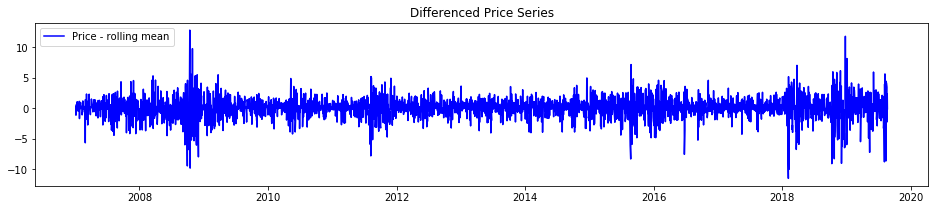

In [7]:
data_diff = financial_data['Close'].diff(periods=1)
data_diff.head(10)

fig = plt.figure(figsize=(16,3))
plt.plot(data_diff, color='blue',label='Price - rolling mean')
plt.legend(loc='best')
plt.title('Differenced Price Series')
plt.show(block=False)


## RSI - Relative Strength Index

In [8]:
def RSI(df,col):
    
    values=df[col]

    RSI=[0]*14


    up, down = [],[]

    for i in range(0,14):
        if values[i+1]> values[i]:
            high=values[i+1]-values[i]
            up.append(high)
        elif values[i+1]< values[i]:
            low=values[i]-values[i+1]
            down.append(low) 
    
    avup = sum(up)/14
    avdown= sum(down)/14+0.00000000000000001
    RS = avup/avdown
    rsi= 100 - (100/(1+RS))
    
    RSI.append(rsi)

    for row in range(15,len(values)):
        if values[row]>values[row-1]:
            high=values[row]-values[row-1]
            avup=(avup*13+high)/14
            avdown=avdown*13/14
            RS = avup/avdown
            rsi= 100 - (100/(1+RS))
            RSI.append(rsi)
            
        else:
            low=values[row-1]-values[row]
            avup=(avup*13)/14
            avdown=(avdown*13+low)/14
            RS = avup/avdown
            rsi= 100 - (100/(1+RS))
            RSI.append(rsi)
        
    df['RSI']=RSI  
    


In [9]:
RSI(financial_data,'Close')
financial_data = financial_data[financial_data.RSI!=0]

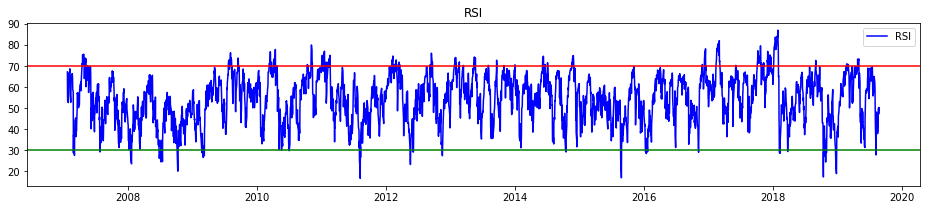

In [10]:
fig = plt.figure(figsize=(16,3))
plt.plot(financial_data['RSI'], color='blue',label='RSI')
plt.legend(loc='best')
plt.axhline(y=30, color='g', linestyle='-')
plt.axhline(y=70, color='r', linestyle='-')
plt.title('RSI')
plt.show(block=False)

### Adding Technical indicators

In [12]:
#7 and 21 day Moving Average
financial_data['ma7'] = financial_data['Close'].rolling(window=7).mean()
financial_data['ma21'] = financial_data['Close'].rolling(window=21).mean()
#MACD
exp1 = financial_data.Close.ewm(span=12, adjust=False).mean()
exp2 = financial_data.Close.ewm(span=26, adjust=False).mean()
financial_data['MACD'] = exp1-exp2

## The Dickey Fuller Test

In [13]:


dftest = adfuller(financial_data['Close'])

# Extract and display test results in a user friendly manner
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
#print(dftest)
print ('Results of Dickey-Fuller Test:')
print(dfoutput)


Results of Dickey-Fuller Test:
Test Statistic                    0.549163
p-value                           0.986293
#Lags Used                       17.000000
Number of Observations Used    3150.000000
Critical Value (1%)              -3.432428
Critical Value (5%)              -2.862458
Critical Value (10%)             -2.567259
dtype: float64


## Features Correlations

In [14]:
corr = financial_data.corr()
corr.style.background_gradient(cmap='coolwarm')

,High,Low,Open,Close,Volume,Adj Close,RSI,ma7,ma21,MACD
High,1,0.999713,0.999868,0.99981,-0.608527,0.996625,0.155335,0.999542,0.998299,0.216723
Low,0.999713,1,0.999815,0.999841,-0.622718,0.996358,0.168526,0.999156,0.997349,0.230425
Open,0.999868,0.999815,1,0.999701,-0.61417,0.996382,0.158877,0.999446,0.997934,0.223
Close,0.99981,0.999841,0.999701,1,-0.616668,0.996659,0.165782,0.999248,0.9977,0.224142
Volume,-0.608527,-0.622718,-0.61417,-0.616668,1,-0.601762,-0.507594,-0.605648,-0.593202,-0.522532
Adj Close,0.996625,0.996358,0.996382,0.996659,-0.601762,1,0.160242,0.996075,0.99482,0.217203
RSI,0.155335,0.168526,0.158877,0.165782,-0.507594,0.160242,1,0.141644,0.110898,0.777247
ma7,0.999542,0.999156,0.999446,0.999248,-0.605648,0.996075,0.141644,1,0.998918,0.213633
ma21,0.998299,0.997349,0.997934,0.9977,-0.593202,0.99482,0.110898,0.998918,1,0.17449
MACD,0.216723,0.230425,0.223,0.224142,-0.522532,0.217203,0.777247,0.213633,0.17449,1


In [15]:
corr = financial_data.corr()
corr.style.background_gradient(cmap='coolwarm')

,High,Low,Open,Close,Volume,Adj Close,RSI,ma7,ma21,MACD
High,1,0.999713,0.999868,0.99981,-0.608527,0.996625,0.155335,0.999542,0.998299,0.216723
Low,0.999713,1,0.999815,0.999841,-0.622718,0.996358,0.168526,0.999156,0.997349,0.230425
Open,0.999868,0.999815,1,0.999701,-0.61417,0.996382,0.158877,0.999446,0.997934,0.223
Close,0.99981,0.999841,0.999701,1,-0.616668,0.996659,0.165782,0.999248,0.9977,0.224142
Volume,-0.608527,-0.622718,-0.61417,-0.616668,1,-0.601762,-0.507594,-0.605648,-0.593202,-0.522532
Adj Close,0.996625,0.996358,0.996382,0.996659,-0.601762,1,0.160242,0.996075,0.99482,0.217203
RSI,0.155335,0.168526,0.158877,0.165782,-0.507594,0.160242,1,0.141644,0.110898,0.777247
ma7,0.999542,0.999156,0.999446,0.999248,-0.605648,0.996075,0.141644,1,0.998918,0.213633
ma21,0.998299,0.997349,0.997934,0.9977,-0.593202,0.99482,0.110898,0.998918,1,0.17449
MACD,0.216723,0.230425,0.223,0.224142,-0.522532,0.217203,0.777247,0.213633,0.17449,1


In [16]:
financial_data.head()

,High,Low,Open,Close,Volume,Adj Close,RSI,ma7,ma21,MACD
Date,,,,,,,,,,
2007-01-24,143.979996,142.910004,142.970001,143.949997,55834700.0,111.501755,67.245941,NaN,NaN,0.000000
2007-01-25,143.919998,142.009995,143.860001,142.259995,73583800.0,110.192719,54.086005,NaN,NaN,-0.134815
2007-01-26,142.649994,141.580002,142.570007,142.130005,67255600.0,110.091988,53.223235,NaN,NaN,-0.249272
2007-01-29,142.800003,141.740005,142.190002,142.050003,66114600.0,110.030083,52.666408,NaN,NaN,-0.342488
2007-01-30,142.860001,142.059998,142.350006,142.789993,70407600.0,110.603264,57.133708,NaN,NaN,-0.352587


## Adding Suffixes

In [17]:
new_cols=[]
for c in list(financial_data.columns):
    updated = c+'_'+ticker
    new_cols.append(updated)
financial_data.columns=new_cols

In [18]:
financial_data.head()

,High_SPY,Low_SPY,Open_SPY,Close_SPY,Volume_SPY,Adj Close_SPY,RSI_SPY,ma7_SPY,ma21_SPY,MACD_SPY
Date,,,,,,,,,,
2007-01-24,143.979996,142.910004,142.970001,143.949997,55834700.0,111.501755,67.245941,NaN,NaN,0.000000
2007-01-25,143.919998,142.009995,143.860001,142.259995,73583800.0,110.192719,54.086005,NaN,NaN,-0.134815
2007-01-26,142.649994,141.580002,142.570007,142.130005,67255600.0,110.091988,53.223235,NaN,NaN,-0.249272
2007-01-29,142.800003,141.740005,142.190002,142.050003,66114600.0,110.030083,52.666408,NaN,NaN,-0.342488
2007-01-30,142.860001,142.059998,142.350006,142.789993,70407600.0,110.603264,57.133708,NaN,NaN,-0.352587


## Saving into final data csv file

In [19]:
#loading combined dataframe 
final_data=pd.read_csv('final_data.csv')
final_data=final_data.set_index('Date', drop=True)

In [20]:
#merging
final_data=final_data.merge(financial_data, left_index=True, right_index=True)

In [21]:
#checking
print(len(final_data))
final_data.head()

2754


,newsSentiment,Bullish,Neutral,Bearish,Bullish 8-Week Mov Avg,Bull-Bear Spread,Bullish Average,Bullish Average + St. Dev,Bullish Average - St. Dev,High_DBC,...,High_SPY,Low_SPY,Open_SPY,Close_SPY,Volume_SPY,Adj Close_SPY,RSI_SPY,ma7_SPY,ma21_SPY,MACD_SPY
Date,,,,,,,,,,,,,,,,,,,,,
2007-01-24,0.42,0.5778,0.1515,0.2727,0.446163,0.3051,0.384907,0.488293,0.281522,23.629999,...,143.979996,142.910004,142.970001,143.949997,55834700.0,111.501755,67.245941,NaN,NaN,0.000000
2007-01-25,0.39,0.3951,0.2716,0.3333,0.445275,0.0618,0.384907,0.488293,0.281522,23.700001,...,143.919998,142.009995,143.860001,142.259995,73583800.0,110.192719,54.086005,NaN,NaN,-0.134815
2007-01-26,-0.31,0.3951,0.2716,0.3333,0.445275,0.0618,0.384907,0.488293,0.281522,23.600000,...,142.649994,141.580002,142.570007,142.130005,67255600.0,110.091988,53.223235,NaN,NaN,-0.249272
2007-01-29,0.17,0.3951,0.2716,0.3333,0.445275,0.0618,0.384907,0.488293,0.281522,23.450001,...,142.800003,141.740005,142.190002,142.050003,66114600.0,110.030083,52.666408,NaN,NaN,-0.342488
2007-01-30,0.47,0.3951,0.2716,0.3333,0.445275,0.0618,0.384907,0.488293,0.281522,23.750000,...,142.860001,142.059998,142.350006,142.789993,70407600.0,110.603264,57.133708,NaN,NaN,-0.352587


In [22]:
#saving
final_data.to_csv('final_data.csv')